# [Assignment 10](https://ovgu-ailab.github.io/idl2023/assignment10.html)

Adrian Bremer

## Setup

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
tfkl = tf.keras.layers

2023-12-18 09:31:48.388091: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 09:31:48.526302: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 09:31:48.526355: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 09:31:48.526844: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 09:31:48.586616: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 09:31:48.587746: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255
train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

train_images.shape

(50000, 32, 32, 3)

## Starter from E-Learning

In [226]:
# example for a very simple MLP architecture for autencoding and classification
# (e.g. for MNIST)
n_hidden = 128
code_dim = 32

# note: we use 784 units since we need the same number of outputs as we have inputs in the data!
# here the final layer has no activation; we could also use tf.nn.sigmoid to force the data to [0, 1]
autoencoder = tf.keras.Sequential([tfkl.Dense(n_hidden, tf.nn.relu),
                                   tfkl.Dense(code_dim),
                                   tfkl.Dense(n_hidden, tf.nn.relu),
                                   tfkl.Dense(784)])

In [227]:
# it's better to keep encoder and decoder separated

encoder = tf.keras.Sequential([tfkl.Dense(n_hidden, tf.nn.relu),
                                   tfkl.Dense(code_dim)])

decoder = tf.keras.Sequential([tfkl.Dense(n_hidden, tf.nn.relu),
                                   tfkl.Dense(784)])

autoencoder = tf.keras.Sequential([encoder, decoder])

autoencoder.build((None, 784))


# very simple to build a classifier on top of the encoder
classifier = tf.keras.Sequential([encoder, tf.keras.layers.Dense(10)])
classifier.build((None, 784))

In [228]:
# compare summary when leaving the argument out (or setting to False)
autoencoder.summary(expand_nested=True)

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_86 (Sequential)  (None, 32)                104608    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| dense_64 (Dense)           (None, 128)               100480   |
|                                                               |
| dense_65 (Dense)           (None, 32)                4128     |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 sequential_87 (Sequential)  (None, 784)               105360    
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| dense_66 (Dense)           (None, 128)               4224     |
|                                                               |
| dense_67 (Dense)           (None, 784)               101136   |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
Total params: 209968 (820.19 KB)
Trainable params: 20

In [229]:
#print("ENCODER")
#print(encoder.trainable_variables)
#print("\nCLASSIFIER")
# note: first two variables of the classifier are equal to the encoder (same random weights)
# weight sharing!
#print(classifier.trainable_variables)

# check identity of the weight objects
print(encoder.trainable_variables[0] is classifier.trainable_variables[0])

True


In [230]:
encoder.trainable = False  # Freeze the encoder!
print("ENCODER")  # no more trainable variables
print(encoder.trainable_variables)
print("\nCLASSIFIER")  # the encoder variables are no longer there! only the classifier variables are trainable
print(classifier.trainable_variables)

# NOTE of course you should train the autoencoder FIRST and only then
# freeze the encoder =)

ENCODER
[]

CLASSIFIER
[<tf.Variable 'dense_68/kernel:0' shape=(32, 10) dtype=float32, numpy=
array([[-6.67713284e-02,  2.11577624e-01,  1.29300684e-01,
        -5.63405454e-02,  2.99171001e-01,  1.70754999e-01,
        -2.69435972e-01, -3.68251741e-01,  9.88336205e-02,
         1.40189618e-01],
       [ 1.52160853e-01, -6.22897744e-02, -4.20471728e-02,
        -3.24654341e-01, -7.97001123e-02, -1.38039485e-01,
         2.47293025e-01, -1.92575336e-01, -1.79137841e-01,
         1.75379723e-01],
       [-6.48225248e-02, -4.38831449e-02,  3.68997425e-01,
         3.12955409e-01,  1.72188878e-03, -2.29484126e-01,
        -1.56468198e-01,  1.25023812e-01,  2.41901904e-01,
         3.84398103e-02],
       [-1.18278444e-01, -2.31800228e-01,  2.80265480e-01,
        -4.61074710e-03, -2.00454891e-01, -3.54995370e-01,
         2.68394977e-01,  3.33717555e-01, -2.86009431e-01,
         2.52877682e-01],
       [ 9.25470889e-02, -3.40357572e-01, -3.25362176e-01,
         3.52746159e-01,  1.8653985

In [231]:
# compiling/training works just like before.
# could create a dataset where target == input and then train using model.fit.
# simple, reasonable loss functions include binary cross-entropy IF you use sigmoid outputs
# or mean squared error.
# But recall the discussion in the exercise about how these are not "really" appropriate.
autoencoder.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError())

# btw be careful, there is also tf.losses.MSE() but this is different :(

In [232]:
# a dataset for an autoencoder may be created like this (to be put into model.fit).
# targets are equal to inputs.
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_images))

In [233]:
# using convolutional AE?
# down- and upscaling can be problematic with MNIST
# e.g. say were are down/upscaling by factor (stride) of 2

# mnist is 28x28. output size != input size! This won't work...
# 28 -> 14 -> 7 -> 4 -> 8 -> 16 -> 32

# one solution: stop downsizing if input size is odd.
# 28 -> 14 -> 7 -> 14 -> 28

# better: use inputs with size 2**n
# 32 -> 16 -> 8 -> 4 -> 8 -> 16 -> 32

In [234]:
# could pad MNIST images to 32 (2**5) like this
mnist = np.random.normal(size=(16, 28, 28, 1))
print(mnist.shape)

mnist_padded = np.pad(mnist, ((0, 0), (2, 2), (2, 2), (0, 0)), mode="constant")
print(mnist_padded.shape)

(16, 28, 28, 1)
(16, 32, 32, 1)


In [235]:
# one way to upsample (e.g. in decoder): transposed convolution with stride > 1
transposed_conv = tf.keras.layers.Conv2DTranspose(4, 3, strides=2, padding="same")
print(transposed_conv(mnist_padded).shape)  # it got bigger!

(16, 64, 64, 4)


In [236]:
# another solution: explicit upsampling
a = tf.constant([[1, 2], [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [237]:
upsampling = tf.keras.layers.UpSampling2D(2)(a[None, :, :, None])  # add batch and channel axis via None
print(upsampling[0, :, :, 0])  # so-called nearest-neighbor upsampling
# now we can use regular convolution (Conv2D) to transform the upsampled values
# Conv2D does not suffer from the checkerboard artifacts like Conv2DTranspose

tf.Tensor(
[[1 1 2 2]
 [1 1 2 2]
 [3 3 4 4]
 [3 3 4 4]], shape=(4, 4), dtype=int32)


In [238]:
# example of how to choose a small labeled subset
# full mnist data: use for training self-supervised model (no labels required)
#(train_imgs, train_labels), _ = tf.keras.datasets.mnist.load_data()

In [239]:
# pick a random subset
#labeled_indices = np.random.choice(60000, replace=False, size=1000)

In [240]:
# choose corresponding images and labels
#image_subset = train_imgs[labeled_indices]
#label_subset = train_labels[labeled_indices]

In [241]:
#image_subset.shape

## Own stuff

### Building a model

#### Transforming the images

In [50]:
def noisify_func(noise_amount=0.2, noise_range=(-0.5, 0.5)):
    if noise_amount < 0.0 or noise_amount > 1.0:
        raise AssertionError("noise_amount has to be in interval [0,1]")
        
    def noisify_img(img):
        (h,w,c) = np.shape(img)
        l,u = noise_range
        for y in range(h):
            for x in range(w):
                for i in range(c):
                    if np.random.uniform(0.0,1.0) < noise_amount:
                        img[y,x,i] += np.random.uniform(l,u)
        img = np.clip(img, 0.0, 1.0)
        return img
    
    return noisify_img

    
def randomly_transform_imgs(
    imgs, 
    transformations=[
        tfkl.RandomCrop(28,28),
        tfkl.RandomBrightness(0.2, [0.0, 1.0]),
        tfkl.RandomFlip(),
        noisify_func()
    ],
    transformation_amount=0.8
):
    """
    imgs of shape (b, h, w, c), b: batch-size, h: height, w: width, c: channels
    
    NOTE: imgs gets augmented -> consider to pass a copy of your data, if you want to preserve it
    """
    b,h,w,c = np.shape(imgs)
    for i in range(b):
        if np.random.uniform(0.0, 1.0) < transformation_amount:
            transform = np.random.choice(transformations)
            # use np.array to be sure, that we have the correct type
            tmp = np.array(transform(imgs[i]))
            # pad to previous shape
            th,tw,tc = np.shape(tmp)
            dh,dw,dc = (h-th,w-tw,c-tc)
            imgs[i] = np.pad(tmp, [[dh//2, dh//2+dh%2], [dw//2, dw//2+dw%2], [dc//2, dc//2+dc%2]])
        
    return imgs


In [51]:
transformed_imgs = randomly_transform_imgs(np.copy(train_images))

#### Trying out the Random Transformation Layer

In [22]:
def plot_images(imgs):
    n = int(np.sqrt(np.shape(imgs)[0]))
    fig,ax = plt.subplots(n,n)
    for i,img in enumerate(imgs):
        y = i//n
        x = i%n
        ax[y,x].imshow(img)
    plt.show()

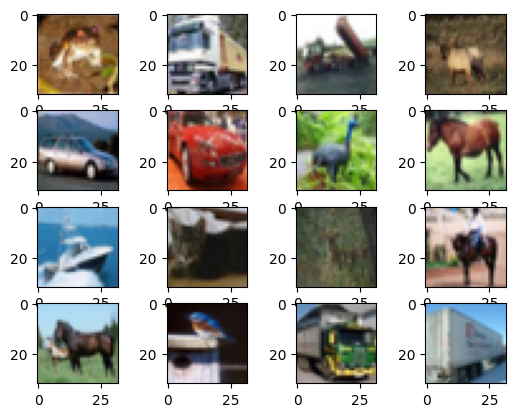

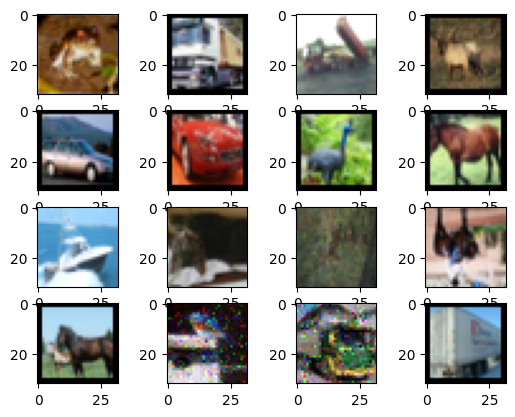

In [53]:
imgs = train_images[:16]
t_imgs = transformed_imgs[:16]
plot_images(imgs)
plot_images(t_imgs)

#### Encoder Decoder

In [54]:
# 32->16->8->4
encoder = tf.keras.Sequential([
    tfkl.Conv2D(8,3,strides=2,padding="same"),
    tfkl.BatchNormalization(),
    tfkl.Conv2D(16,3,strides=2,padding="same"),
    tfkl.BatchNormalization(),
    tfkl.Conv2D(32,3,strides=2,padding="same")#,
    #tfkl.Flatten()
])

# 4->8->16->32
decoder = tf.keras.Sequential([
    tfkl.Conv2DTranspose(16,3,strides=2,padding="same"),
    tfkl.Conv2DTranspose(8,3,strides=2,padding="same"),
    tfkl.Conv2DTranspose(3,3,strides=2,padding="same")
])


#decoder = tf.keras.Sequential([
#    tfkl.Dense(1024,activation="relu"),
#    tfkl.Dense(2048,activation="relu"),
#    tfkl.Dense(32*32*3,activation="sigmoid"),
#    tfkl.Reshape((None,32,32,3))
#])
"""
encoder = tf.keras.Sequential([
    tfkl.Conv2D(2,5,padding="same"),
    tfkl.BatchNormalization(),
    tfkl.Conv2D(1,3,padding='same')
])

decoder = tf.keras.Sequential([
    tfkl.Conv2D(2,3,padding="same"),
    tfkl.Conv2D(3,5,padding="same")
])
"""

autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.build((None,32,32,3))
autoencoder.summary(expand_nested=True)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 4, 4, 32)          6128      
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| conv2d_10 (Conv2D)         (None, 16, 16, 8)         224      |
|                                                               |
| batch_normalization_5 (Ba  (None, 16, 16, 8)         32       |
| tchNormalization)                                             |
|                                                               |
| conv2d_11 (Conv2D)         (None, 8, 8, 16)          1168     |
|                                                               |
| batch_normalization_6 (Ba  (None, 8, 8, 16)          64       |
| tchNormalization)                                             |
|                                                               |
| conv2d_12 (Conv2D)         (None, 4, 4, 32)        

In [55]:
img_prediction_data = tf.data.Dataset.from_tensor_slices((transformed_imgs, train_images)).shuffle(50000).batch(128).repeat()

In [56]:
autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy']
)

In [59]:
#early_stop = tf.keras.callbacks.EarlyStopping(patience=3)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau()
autoencoder.fit(
    img_prediction_data, 
    epochs=50, steps_per_epoch=200#, 
    #callbacks=[early_stop,reduce_lr], 
    #validation_data=(test_images,test_labels)
)

Epoch 1/50
200/200 [==============================] - 3s 17ms/step - loss: 0.0305 - accuracy: 0.4384
Epoch 2/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0294 - accuracy: 0.4608
Epoch 3/50
200/200 [==============================] - 3s 14ms/step - loss: 0.0284 - accuracy: 0.4965
Epoch 4/50
200/200 [==============================] - 3s 14ms/step - loss: 0.0277 - accuracy: 0.5261
Epoch 5/50
200/200 [==============================] - 3s 14ms/step - loss: 0.0275 - accuracy: 0.5388
Epoch 6/50
200/200 [==============================] - 3s 14ms/step - loss: 0.0267 - accuracy: 0.5503
Epoch 7/50
200/200 [==============================] - 3s 14ms/step - loss: 0.0264 - accuracy: 0.5544
Epoch 8/50
200/200 [==============================] - 3s 14ms/step - loss: 0.0262 - accuracy: 0.5640
Epoch 9/50
200/200 [==============================] - 3s 14ms/step - loss: 0.0258 - accuracy: 0.5684
Epoch 10/50
200/200 [==============================] - 3s 14ms/step - loss: 0.0259 - accura

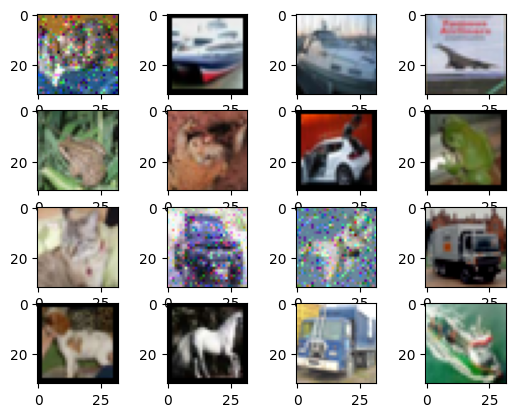

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

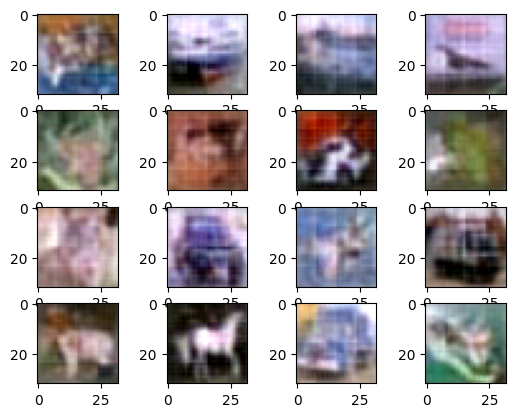

In [60]:
test = randomly_transform_imgs(np.copy(test_images[:16]))
restored_test_images = autoencoder(test)
plot_images(test)
plot_images(restored_test_images)

#### Save model for later

In [61]:
autoencoder.save('conv_deconv_small.keras')

#### Trying if it worked

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

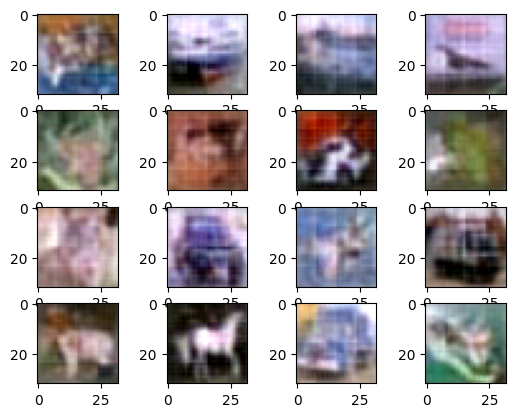

In [62]:
loaded_model = tf.keras.models.load_model('conv_deconv_small.keras')

r_restored_test_images = loaded_model(test)
#plot_images(test)
plot_images(r_restored_test_images)

In [63]:
diff = r_restored_test_images - restored_test_images
np.max(diff)

0.0

### Taking the encoder to build classifier

In [5]:
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(50000).batch(128).repeat()
test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(128).repeat(1)

#### Load model & get encoder
Sadly I forgot to save encoder and decoder seperatly

In [3]:
model = tf.keras.models.load_model('conv_deconv_small.keras')
for i,layer in enumerate(model.layers):
    print(f"{i}: {layer.name}")

0: sequential_9
1: sequential_10


In [4]:
encoder = model.layers[0]
encoder.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 16, 16, 8)         224       
                                                                 
 batch_normalization_5 (Bat  (None, 16, 16, 8)         32        
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 16)          1168      
                                                                 
 batch_normalization_6 (Bat  (None, 8, 8, 16)          64        
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
Total params: 6128 (23.94 KB)
Trainable params: 6080 (

#### Build classifier

In [5]:
# don't train encoder
encoder.trainable = False

pretrained_classifier_freeze = tf.keras.Sequential([
    encoder,
    tfkl.Flatten(),
    tfkl.Dense(128, activation="relu"),
    tfkl.Dense(10)
])

pretrained_classifier_freeze.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [17]:
#early_stop = tf.keras.callbacks.EarlyStopping(patience=3)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau()

pretrained_classifier_freeze.fit(
    train_data,
    epochs=20,
    steps_per_epoch=50#,
    #validation_data=test_data,
    #callbacks=[early_stop, reduce_lr]
)

Epoch 1/20
50/50 [==============================] - 0s 6ms/step - loss: 2.3026 - accuracy: 0.1016
Epoch 2/20
50/50 [==============================] - 0s 7ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 3/20
50/50 [==============================] - 0s 6ms/step - loss: 2.3026 - accuracy: 0.1008
Epoch 4/20
50/50 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1036
Epoch 5/20
50/50 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.0975
Epoch 6/20
50/50 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.0950
Epoch 7/20
50/50 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.0952
Epoch 8/20
50/50 [==============================] - 0s 6ms/step - loss: 2.3026 - accuracy: 0.1050
Epoch 9/20
50/50 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1042
Epoch 10/20
50/50 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1006
Epoch 11/20
50/50 [

In [18]:
pretrained_classifier_freeze.evaluate(test_data)

79/79 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.0994


[2.3025832176208496, 0.09939999878406525]

#### Allowing the pretrained encoder to also train

In [7]:
# allow encoder to train
encoder.trainable = True

pretrained_classifier = tf.keras.Sequential([
    encoder,
    tfkl.Flatten(),
    tfkl.Dense(128, activation="relu"),
    tfkl.Dense(10)
])

pretrained_classifier.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [8]:
pretrained_classifier.fit(train_data, epochs=20, steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 2s 13ms/step - loss: 12.1790 - accuracy: 0.1059
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 12.1874 - accuracy: 0.1044
Epoch 3/20
50/50 [==============================] - 0s 8ms/step - loss: 12.3536 - accuracy: 0.0967
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 12.4669 - accuracy: 0.0948
Epoch 5/20
50/50 [==============================] - 0s 8ms/step - loss: 12.4216 - accuracy: 0.1019
Epoch 6/20
50/50 [==============================] - 0s 9ms/step - loss: 12.4795 - accuracy: 0.0953
Epoch 7/20
50/50 [==============================] - 0s 9ms/step - loss: 12.3662 - accuracy: 0.0998
Epoch 8/20
50/50 [==============================] - 0s 9ms/step - loss: 12.5224 - accuracy: 0.0993
Epoch 9/20
50/50 [==============================] - 0s 8ms/step - loss: 12.3385 - accuracy: 0.1023
Epoch 10/20
50/50 [==============================] - 0s 8ms/step - loss: 12.3158 - accuracy: 0.1058
Epoch 11

#### Summary
I don't even try to train the same model without pre-training via unsupervised learning.  
Maybe I did to many transformations and a simple Autoencoder or Denoising-Autoencoder would have done better

### New approach: Predicting the applied rotation
Now I will try a different unsupervised-learning approach: predicting the rotation of the image.
With this I can make the model bigger. Previously there was the problem that a CNN stores the image information inside the states instead of the kernels. Therefore one can't make the model that big.

With the new approach I hope to be able to make the model bigger without this problem in mind. Furthermore, the model needs to gain a deep understanding of the images to know when it is rotated correctly.

#### Rotating the data

In [22]:
# custom rotation by 0°, 90°, 180° or 270° because tfkl.RandomRotation samples the rotation from a continous interval
def rotate_img_randomly(img):
    """
    img: shape (h,w,c), h: height, w: width, c: channels
    
    returns: applied (rotation, rotated_img)
    """
    num_rots = int(np.random.uniform(0, 4))
    return num_rots, np.rot90(img, num_rots, (0,1))

def rotate_imgs_randomly(imgs):
    """imgs: shape (b,h,w,c)"""
    s = np.shape(imgs)
    rotated = np.zeros(s)
    labels = np.zeros(s[0])
    for i,img in enumerate(imgs):
        l, r = rotate_img_randomly(img)
        labels[i] = l
        rotated[i] = r
    return labels, rotated

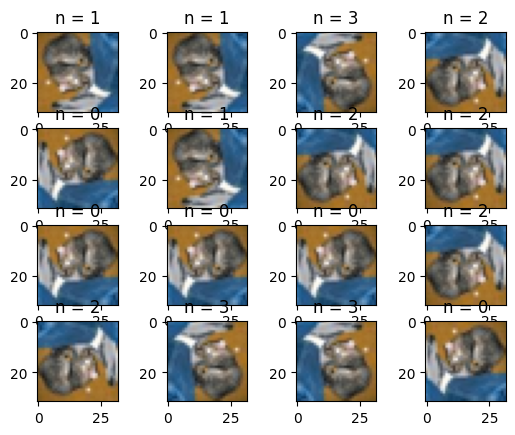

In [21]:
test_img = test_images[0]
N = 4
fig,ax=plt.subplots(N,N)
for i in range(N*N):
    n,rti = rotate_img_randomly(test_img)
    ax[i//N,i%N].imshow(rti)
    ax[i//N,i%N].set_title(f'n = {n}')
plt.show()

In [23]:
r_labels, r_imgs = rotate_imgs_randomly(train_images)

In [25]:
r_train_data = tf.data.Dataset.from_tensor_slices((r_imgs, r_labels)).shuffle(50000).batch(128).repeat()

2023-12-15 15:41:31.053496: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1228800000 exceeds 10% of free system memory.


#### The model

In [26]:
# 32->16->8->4->2
encoder = tf.keras.Sequential([
    tfkl.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", strides=2),
    tfkl.MaxPooling2D(strides=1),
    tfkl.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", strides=2),
    tfkl.Conv2D(filters=64, kernel_size=1, padding="same"),
    tfkl.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", strides=2),
    tfkl.Conv2D(filters=256, kernel_size=3, padding="valid", activation="relu"),
    tfkl.Flatten(),
    tfkl.Dense(units=64,activation="relu")
])
classifier = tf.keras.Sequential([
    encoder,
    tfkl.Dense(4)
])

classifier.build((None, 32, 32, 3))
classifier.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [27]:
classifier.fit(r_train_data, epochs=20, steps_per_epoch=256)

2023-12-15 15:52:00.944970: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1228800000 exceeds 10% of free system memory.


Epoch 1/20
256/256 [==============================] - 15s 53ms/step - loss: 12.1164 - accuracy: 0.2470
Epoch 2/20
256/256 [==============================] - 13s 52ms/step - loss: 12.1551 - accuracy: 0.2459
Epoch 3/20
256/256 [==============================] - 13s 52ms/step - loss: 12.0891 - accuracy: 0.2500
Epoch 4/20
256/256 [==============================] - 14s 53ms/step - loss: 12.1033 - accuracy: 0.2491
Epoch 5/20
256/256 [==============================] - 13s 52ms/step - loss: 12.1615 - accuracy: 0.2455
Epoch 6/20
256/256 [==============================] - 13s 52ms/step - loss: 12.1004 - accuracy: 0.2493
Epoch 7/20
256/256 [==============================] - 13s 52ms/step - loss: 12.1684 - accuracy: 0.2450
Epoch 8/20
256/256 [==============================] - 13s 52ms/step - loss: 12.0684 - accuracy: 0.2513
Epoch 9/20
256/256 [==============================] - 13s 52ms/step - loss: 12.1550 - accuracy: 0.2459
Epoch 10/20
256/256 [==============================] - 14s 53ms/step - lo

#### Summary
This problem seems to be too hard on it's own.

#### _Idea_:  First Denoising-Autoencoder & then rotation


In [3]:
def noisify_img(img, noise_range=(-1.0, 1.0), noise_amount=0.3):
    (h,w,c) = np.shape(img)
    l,u = noise_range
    for y in range(h):
        for x in range(w):
            for i in range(c):
                if np.random.uniform(0.0,1.0) < noise_amount:
                    img[y,x,i] += np.random.uniform(l,u)
    img = np.clip(img, 0.0, 1.0)
    return img

def noisify_imgs(imgs, noise_range=(-1.0, 1.0), noise_amount=0.3):
    noised = np.zeros(np.shape(imgs))
    for i,img in enumerate(imgs):
        noised[i] = noisify_img(img, noise_range, noise_amount)
        
    return noised

In [8]:
n_train_imgs = noisify_imgs(train_images)

2023-12-18 08:53:41.401704: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1228800000 exceeds 10% of free system memory.
2023-12-18 08:53:42.311253: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


In [12]:
n_train_data = tf.data.Dataset.from_tensor_slices((n_train_imgs, train_images)).shuffle(50000).batch(128).repeat()

2023-12-18 08:55:31.296256: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1228800000 exceeds 10% of free system memory.


In [17]:
encoder = tf.keras.Sequential([
    tfkl.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", strides=2),
    tfkl.MaxPooling2D(strides=1),
    tfkl.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", strides=2),
    tfkl.Conv2D(filters=64, kernel_size=1, padding="same"),
    tfkl.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", strides=2),
    tfkl.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", strides=2)
])
decoder = tf.keras.Sequential([
    tfkl.Conv2DTranspose(128, 3, padding="same", activation="relu", strides=2),
    tfkl.Conv2DTranspose(64, 5, padding="same", activation="relu", strides=2),
    tfkl.Conv2DTranspose(32, 3, padding="same", activation="relu", strides=2),
    tfkl.Conv2DTranspose(3, 3, padding="same", activation="sigmoid", strides=2)
])

autoencoder = tf.keras.Sequential([encoder, decoder])

In [19]:
autoencoder.build((None,32,32,3))
autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy']
)

In [20]:
autoencoder.fit(n_train_data, epochs=20, steps_per_epoch=128)

Epoch 1/20
128/128 [==============================] - 12s 87ms/step - loss: 0.3891 - accuracy: 0.3694
Epoch 2/20
128/128 [==============================] - 11s 83ms/step - loss: 0.3792 - accuracy: 0.3686
Epoch 3/20
128/128 [==============================] - 11s 84ms/step - loss: 0.3838 - accuracy: 0.3744
Epoch 4/20
128/128 [==============================] - 11s 86ms/step - loss: 0.3894 - accuracy: 0.3838
Epoch 5/20
128/128 [==============================] - 12s 93ms/step - loss: 0.3887 - accuracy: 0.3807
Epoch 6/20
128/128 [==============================] - 12s 96ms/step - loss: 0.3892 - accuracy: 0.3827
Epoch 7/20
128/128 [==============================] - 12s 91ms/step - loss: 0.3893 - accuracy: 0.3827
Epoch 8/20
128/128 [==============================] - 11s 83ms/step - loss: 0.3890 - accuracy: 0.3836
Epoch 9/20
128/128 [==============================] - 11s 89ms/step - loss: 0.3892 - accuracy: 0.3812
Epoch 10/20
128/128 [==============================] - 11s 89ms/step - loss: 0.389

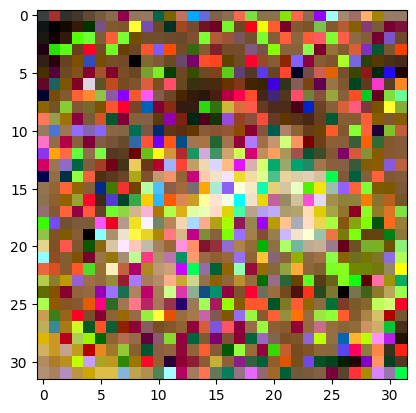

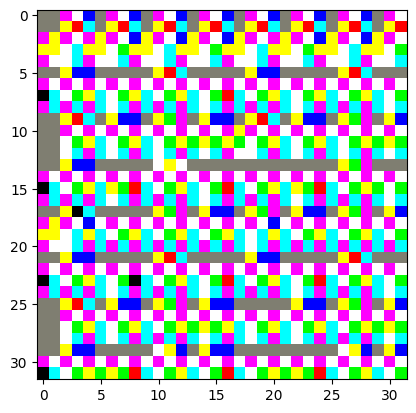

In [26]:
test_img = np.reshape(n_train_imgs[0], (1,32,32,3))
plt.imshow(test_img[0])
plt.show()
dn_test_img = autoencoder(test_img)
plt.imshow(dn_test_img[0])
plt.show()

#### Summary
This is way to noisy and denoising seems to be quite hard...

### Only Denoising with less noise

#### Finding good noise_amount

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4


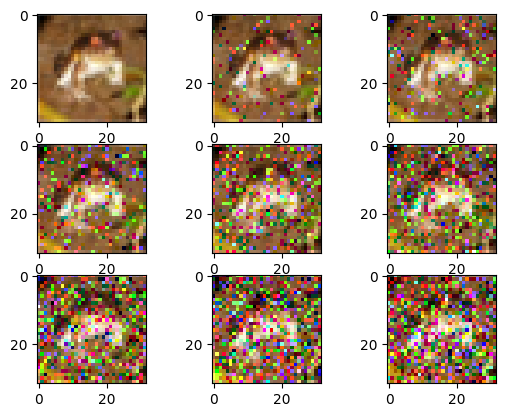

In [30]:
imgs = []
for a in range(9):
    print(a/20)
    imgs.append(noisify_img(np.copy(train_images[0]), noise_amount=a/20))
    
plot_images(imgs)

#### Training a denosiing autoencoder (less noise)

In [20]:
encoder = tf.keras.Sequential([
    tfkl.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", strides=2),
    tfkl.MaxPooling2D(strides=1),
    tfkl.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", strides=2),
    tfkl.Conv2D(filters=64, kernel_size=1, padding="same"),
    tfkl.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", strides=2),
    tfkl.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", strides=2)
])
decoder = tf.keras.Sequential([
    tfkl.Conv2DTranspose(128, 3, padding="same", activation="relu", strides=2),
    tfkl.Conv2DTranspose(64, 5, padding="same", activation="relu", strides=2),
    tfkl.Conv2DTranspose(32, 3, padding="same", activation="relu", strides=2),
    tfkl.Conv2DTranspose(3, 3, padding="same", activation="sigmoid", strides=2)
])

autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.build((None,32,32,3))
autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy']
)

In [5]:
noised_train_imgs = noisify_imgs(np.copy(train_images), noise_amount=0.1)

In [6]:
noised_train_data = tf.data.Dataset.from_tensor_slices((noised_train_imgs, train_images)).shuffle(50000).batch(128).repeat()

2023-12-18 09:37:59.820401: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1228800000 exceeds 10% of free system memory.


In [10]:
autoencoder.fit(noised_train_data, epochs=20, steps_per_epoch=128)

2023-12-18 09:38:25.387771: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1228800000 exceeds 10% of free system memory.


Epoch 1/20
128/128 [==============================] - 12s 86ms/step - loss: 0.2923 - accuracy: 0.3510
Epoch 2/20
128/128 [==============================] - 11s 84ms/step - loss: 0.3030 - accuracy: 0.3411
Epoch 3/20
128/128 [==============================] - 11s 84ms/step - loss: 0.3020 - accuracy: 0.3417
Epoch 4/20
128/128 [==============================] - 11s 84ms/step - loss: 0.3023 - accuracy: 0.3418
Epoch 5/20
128/128 [==============================] - 11s 84ms/step - loss: 0.3026 - accuracy: 0.3412
Epoch 6/20
128/128 [==============================] - 11s 85ms/step - loss: 0.3019 - accuracy: 0.3414
Epoch 7/20
128/128 [==============================] - 11s 85ms/step - loss: 0.3024 - accuracy: 0.3413
Epoch 8/20
128/128 [==============================] - 11s 84ms/step - loss: 0.3019 - accuracy: 0.3422
Epoch 9/20
128/128 [==============================] - 11s 90ms/step - loss: 0.3026 - accuracy: 0.3409
Epoch 10/20
128/128 [==============================] - 11s 86ms/step - loss: 0.302

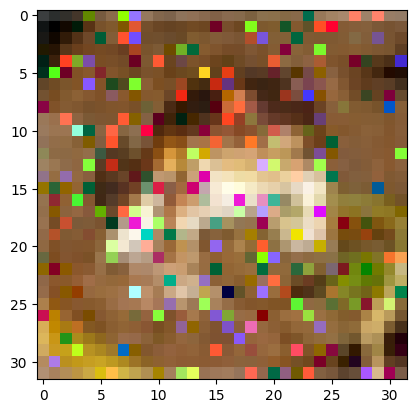

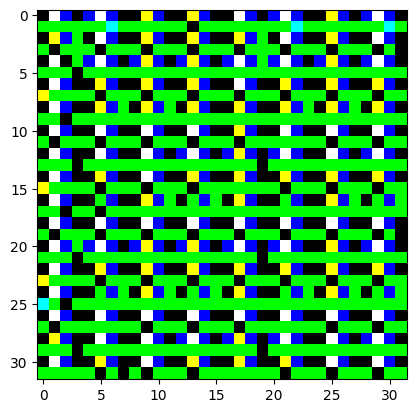

In [12]:
test_img = np.reshape(noised_train_imgs[0], (1,32,32,3))
plt.imshow(test_img[0])
plt.show()
dn_test_img = autoencoder(test_img)
plt.imshow(dn_test_img[0])
plt.show()

#### Normal Autoencoder first -> Denoising next

In [15]:
normal_train_data = tf.data.Dataset.from_tensor_slices((train_images, train_images)).shuffle(50000).batch(128).repeat()

In [21]:
autoencoder.fit(normal_train_data, epochs=10, steps_per_epoch=128)

Epoch 1/10
128/128 [==============================] - 12s 85ms/step - loss: 0.2827 - accuracy: 0.3991
Epoch 2/10
128/128 [==============================] - 11s 84ms/step - loss: 0.2907 - accuracy: 0.4045
Epoch 3/10
128/128 [==============================] - 11s 84ms/step - loss: 0.2911 - accuracy: 0.4040
Epoch 4/10
128/128 [==============================] - 11s 90ms/step - loss: 0.2909 - accuracy: 0.4037
Epoch 5/10
128/128 [==============================] - 11s 87ms/step - loss: 0.2910 - accuracy: 0.4039
Epoch 6/10
128/128 [==============================] - 11s 85ms/step - loss: 0.2911 - accuracy: 0.4042
Epoch 7/10
128/128 [==============================] - 11s 84ms/step - loss: 0.2907 - accuracy: 0.4036
Epoch 8/10
128/128 [==============================] - 11s 85ms/step - loss: 0.2911 - accuracy: 0.4042
Epoch 9/10
128/128 [==============================] - 11s 85ms/step - loss: 0.2909 - accuracy: 0.4045
Epoch 10/10
128/128 [==============================] - 11s 84ms/step - loss: 0.291

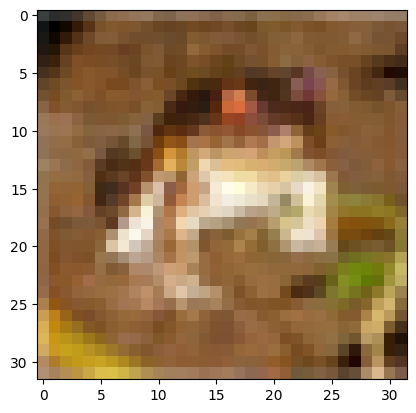

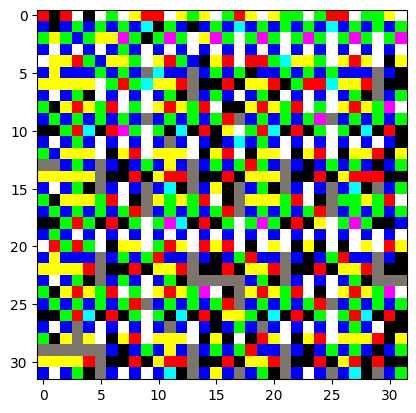

In [23]:
test_img = np.reshape(train_images[0], (1,32,32,3))
plt.imshow(test_img[0])
plt.show()
dn_test_img = autoencoder(test_img)
plt.imshow(dn_test_img[0])
plt.show()

#### Suggestion
Model is too big, to learn what it should do.

Ideas:
- Make the decoder smaller or just a MLP.
- Make everything smaller and pretrain decoder. Then use the pretrained-decoder to decode what the encoder does.


### Pretrain decoder and smaller decoder

In [32]:
full_encoder = tf.keras.Sequential([
    tfkl.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", strides=2),
    tfkl.MaxPooling2D(strides=1),
    tfkl.BatchNormalization(),
    tfkl.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", strides=2),
    tfkl.Conv2D(filters=64, kernel_size=1, padding="same"),
    tfkl.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", strides=2),
    tfkl.BatchNormalization(),
    tfkl.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", strides=2),
    tfkl.BatchNormalization(),
    tfkl.Flatten()
])
small_encoder = tf.keras.Sequential([
    tfkl.Conv2D(16,3,padding="same", strides=2),
    tfkl.BatchNormalization(),
    tfkl.Conv2D(32,3,padding="same", strides=2),
    tfkl.BatchNormalization(),
    tfkl.Conv2D(64,3,padding="same", strides=2),
    tfkl.Flatten()
])
decoder = tf.keras.Sequential([
    tfkl.Dense(1024+512, activation="relu"),
    tfkl.Dense(2048+512, activation='relu'),
    tfkl.Dense(32*32*3, activation="sigmoid"),
    tfkl.Reshape((32,32,3))
])

small_autoencoder = tf.keras.Sequential([small_encoder, decoder])
small_autoencoder.build((None,32,32,3))
small_autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy']
)

full_autoencoder = tf.keras.Sequential([full_encoder, decoder])
full_autoencoder.build((None,32,32,3))
full_autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy']
)

In [33]:
small_autoencoder.fit(normal_train_data, epochs=10, steps_per_epoch=128)

Epoch 1/10
128/128 [==============================] - 20s 153ms/step - loss: 0.2690 - accuracy: 0.4597
Epoch 2/10
128/128 [==============================] - 20s 153ms/step - loss: 0.2849 - accuracy: 0.4601
Epoch 3/10
128/128 [==============================] - 20s 153ms/step - loss: 0.2878 - accuracy: 0.4598
Epoch 4/10
128/128 [==============================] - 20s 155ms/step - loss: 0.2872 - accuracy: 0.4569
Epoch 5/10
128/128 [==============================] - 21s 162ms/step - loss: 0.2879 - accuracy: 0.4577
Epoch 6/10
128/128 [==============================] - 24s 187ms/step - loss: 0.2866 - accuracy: 0.4590
Epoch 7/10
128/128 [==============================] - 20s 156ms/step - loss: 0.2866 - accuracy: 0.4599
Epoch 8/10
128/128 [==============================] - 21s 164ms/step - loss: 0.2873 - accuracy: 0.4555
Epoch 9/10
128/128 [==============================] - 20s 154ms/step - loss: 0.2880 - accuracy: 0.4609
Epoch 10/10
128/128 [==============================] - 20s 159ms/step - l

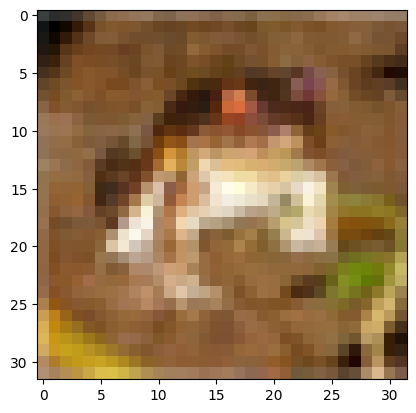

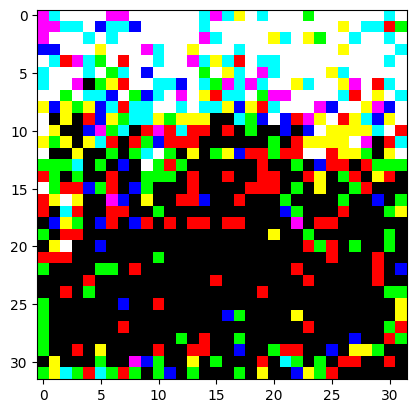

In [34]:
test_img = np.reshape(train_images[0], (1,32,32,3))
plt.imshow(test_img[0])
plt.show()
dn_test_img = small_autoencoder(test_img)
plt.imshow(dn_test_img[0])
plt.show()